<a href="https://colab.research.google.com/github/LiyaUnknown/convolutional_nural_network/blob/main/Conv2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
# import modules

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [208]:
# loading data

data = tf.keras.datasets.cifar10

(train_ , train_lbl) , (test_ , test_lbl) = data.load_data()

In [209]:
# look at the data

print(f'the shape of train data is {train_.shape}')
print(f'the shape of test data is {test_.shape}')

print(f'the shape of train labels is {train_lbl.shape}')
print(f'the shape of test labels data is {test_lbl.shape}')

the shape of train data is (50000, 32, 32, 3)
the shape of test data is (10000, 32, 32, 3)
the shape of train labels is (50000, 1)
the shape of test labels data is (10000, 1)


In [210]:
# convert numbers into labels and create a num classes

class_names = ['airplan' , 'automobil' , 'bird' , 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' , 'truck']
num_values = list(set(train_lbl.reshape((50000)).tolist()))

num_classes = dict(zip(num_values , class_names))

In [211]:
num_classes

{0: 'airplan',
 1: 'automobil',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

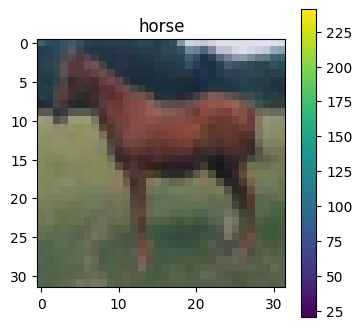

In [212]:
# look at the images 

import random

plt.figure(figsize = (4,4))

img_indx = random.randint(0,50000)
plt.imshow(train_[img_indx])
plt.colorbar()
plt.title(num_classes[train_lbl[img_indx].tolist()[0]])

plt.show()

In [213]:
# convert image pixels between 0 and 1

train_ , test_ = train_ / 255.0 , test_ / 255.0

In [237]:

model = tf.keras.Sequential([
    
    # Convolutional layers
    tf.keras.layers.Conv2D(32 , (3,3) , activation = 'relu' , input_shape = (32,32 , 3)) ,
    tf.keras.layers.MaxPool2D((2,2)) ,
    tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    tf.keras.layers.MaxPool2D((2,2)) ,
    tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,

    # classifier layers

    tf.keras.layers.Flatten() , 
    tf.keras.layers.Dense(64 , activation = 'relu') ,
    tf.keras.layers.Dropout(0.5) , 
    tf.keras.layers.Dense(10) , 

])

In [238]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1933 (Conv2D)        (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_256 (MaxPooli  (None, 15, 15, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_1934 (Conv2D)        (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_257 (MaxPooli  (None, 6, 6, 64)         0         
 ng2D)                                                           
                                                                 
 conv2d_1935 (Conv2D)        (None, 4, 4, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 1024)             

In [239]:
# compile the model

op = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer = op , loss = loss , metrics = ['accuracy'])

In [240]:
# trsin the model

epoch = 20
his = model.fit(train_ , train_lbl , epochs=epoch , validation_data=(test_ , test_lbl))

Epoch 1/20
1563/1563 [==============================] - 87s 54ms/step - loss: 1.7557 - accuracy: 0.3494 - val_loss: 1.3976 - val_accuracy: 0.5049
Epoch 2/20
1563/1563 [==============================] - 81s 52ms/step - loss: 1.4339 - accuracy: 0.4840 - val_loss: 1.2258 - val_accuracy: 0.5702
Epoch 3/20
1563/1563 [==============================] - 81s 52ms/step - loss: 1.2807 - accuracy: 0.5459 - val_loss: 1.1391 - val_accuracy: 0.5859
Epoch 4/20
1563/1563 [==============================] - 80s 51ms/step - loss: 1.1752 - accuracy: 0.5868 - val_loss: 1.0291 - val_accuracy: 0.6312
Epoch 5/20
1563/1563 [==============================] - 79s 51ms/step - loss: 1.0905 - accuracy: 0.6204 - val_loss: 0.9789 - val_accuracy: 0.6497
Epoch 6/20
1563/1563 [==============================] - 79s 51ms/step - loss: 1.0196 - accuracy: 0.6419 - val_loss: 0.9388 - val_accuracy: 0.6704
Epoch 7/20
1563/1563 [==============================] - 81s 52ms/step - loss: 0.9787 - accuracy: 0.6595 - val_loss: 0.9488 -

In [241]:
# check how our model learn

model.evaluate(test_ , test_lbl , verbose=0)

[0.9055432677268982, 0.7189000248908997]

<Figure size 500x500 with 0 Axes>

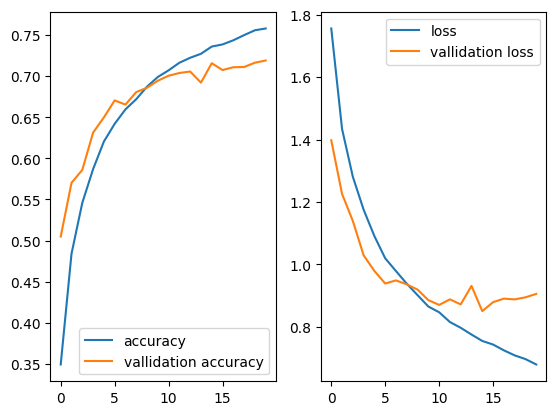

In [242]:
# plot the information of model

plt.figure(figsize = (5 , 5))

loss_spot = his.history['loss']
acc_spot = his.history['accuracy']
val_loss_spot = his.history['val_loss']
val_acc_spot = his.history['val_accuracy']

epoch_range = range(epoch)

fig , axis = plt.subplots(1,2)

axis[0].plot(epoch_range , acc_spot , label = 'accuracy')
axis[0].plot(epoch_range , val_acc_spot , label = 'vallidation accuracy')
plt.legend()


axis[1].plot(epoch_range , loss_spot , label = 'loss')
axis[1].plot(epoch_range , val_loss_spot , label = 'vallidation loss')

axis[0].legend()
axis[1].legend()
plt.show()

In [243]:
# makes predictions list

prediction = model.predict(test_)


313/313 [==============================] - 4s 13ms/step


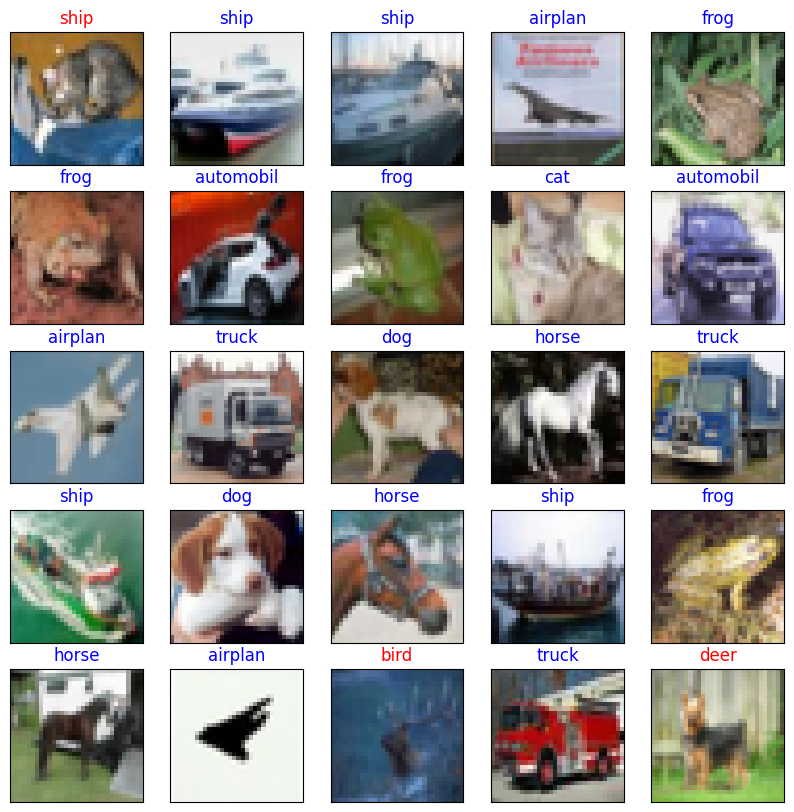

In [244]:
# look how our model predict the results

plt.figure(figsize = (10 ,10))

for i in range(0 , 25) : 

    plt.subplot(5,5,i+1)
    plt.imshow(test_[i])
    plt.xticks([])
    plt.yticks([])

    pre = np.argmax(prediction[i])

    color = 'blue' if test_lbl[i] == pre else 'red'
    plt.title(num_classes[pre] , color = color) 


plt.show()

<Figure size 400x400 with 0 Axes>

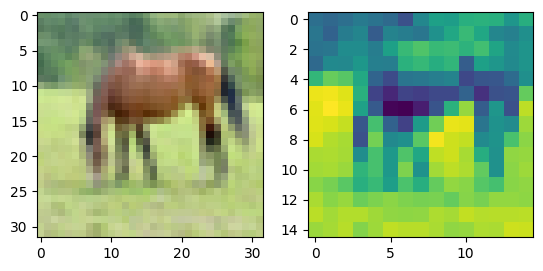

In [247]:
# you can see how one convolutional layer work with activation relu 

plt.figure(figsize = (4 ,4))
fill = 32
img = test_[60]
con = tf.keras.layers.Conv2D(fill,(3,3) , activation = 'relu' , input_shape = (32,32,3))
m1 = np.squeeze(con(img[np.newaxis]))
con = tf.keras.layers.MaxPool2D((2,2))
m1 = con(m1[np.newaxis])

fig , ax = plt.subplots(1,2)
ax[1].imshow(m1[0][:,:,fill-1])
ax[0].imshow(img)

plt.show()

<Figure size 400x400 with 0 Axes>

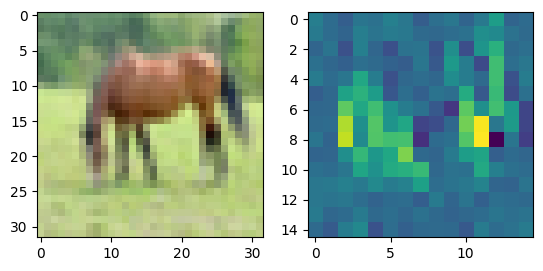

In [249]:
# you can see how one convolutional layer work with activation sigmoid 

plt.figure(figsize = (4 ,4))
fill = 32
img = test_[60]
con = tf.keras.layers.Conv2D(fill,(3,3) , activation = 'sigmoid' , input_shape = (32,32,3))
m1 = np.squeeze(con(img[np.newaxis]))
con = tf.keras.layers.MaxPool2D((2,2))
m1 = con(m1[np.newaxis])

fig , ax = plt.subplots(1,2)
ax[1].imshow(m1[0][:,:,fill-1])
ax[0].imshow(img)



plt.show()

<Figure size 400x400 with 0 Axes>

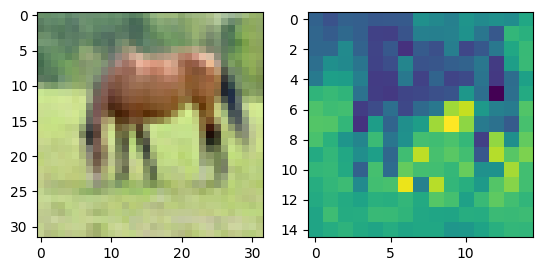

In [250]:
# you can see how one convolutional layer work with activation softmax 

plt.figure(figsize = (4 ,4))
fill = 32
img = test_[60]
con = tf.keras.layers.Conv2D(fill,(3,3) , activation = 'softmax' , input_shape = (32,32,3))
m1 = np.squeeze(con(img[np.newaxis]))
con = tf.keras.layers.MaxPool2D((2,2))
m1 = con(m1[np.newaxis])

fig , ax = plt.subplots(1,2)
ax[1].imshow(m1[0][:,:,fill-1])
ax[0].imshow(img)



plt.show()

<Figure size 400x400 with 0 Axes>

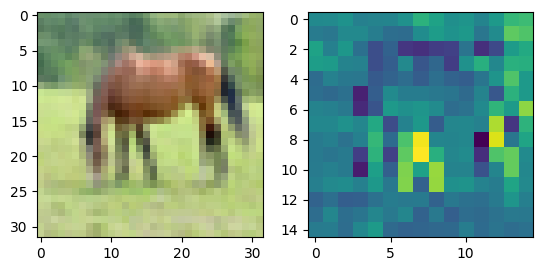

In [252]:
# you can see how one convolutional layer work with activation tanh 

plt.figure(figsize = (4 ,4))
fill = 32
img = test_[60]
con = tf.keras.layers.Conv2D(fill,(3,3) , activation = 'tanh' , input_shape = (32,32,3))
m1 = np.squeeze(con(img[np.newaxis]))
con = tf.keras.layers.MaxPool2D((2,2))
m1 = con(m1[np.newaxis])

fig , ax = plt.subplots(1,2)
ax[1].imshow(m1[0][:,:,fill-1])
ax[0].imshow(img)



plt.show()